In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import re

## Edit title

In [79]:
cancer_data = pd.read_excel('../../data/cancer_data.xls')
cancer_info = pd.read_excel('../../data/cancer_info.xlsx')

title_dic = cancer_info.groupby('变量名')['变量名缩写'].apply(list).to_dict()
for k, v in title_dic.items():
    cancer_data.rename(columns={k:v[0]}, inplace=True)
cancer_data.replace('UN', np.nan, inplace=True)

cancer_data.to_csv('../../data/cancer_data.csv', index=False)

## Process error value

In [121]:
cancer_data = pd.read_csv('../../data/cancer_data.csv')
for i in cancer_data.columns:
    cancer_data[i] = cancer_data[i].apply(lambda x: np.nan if isinstance(x, str) and x[0] in ['>','<'] else x)

C:\Users\Chi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,34,50,66,68,69,70,71,72) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
cancer_data.columns

Index(['ID', 'A=Case, B=Control', 'Origin', 'A=male B=female', 'Age',
       'Pattern', 'TNM', 'Smoke', 'RBC', 'HGB', 'HCT', 'MCV ', 'MCH', 'MCHC ',
       'RDW-CV', 'RDW-SD', 'PLT', 'PCT', 'MPV', 'P-LCR', 'PDW', 'WBC', 'NEUT%',
       'LYM%', 'MONO%', 'EO%', 'BASO%', 'AC%', 'NEUT', 'LYMPH', 'MONO', 'EO',
       'BASO', 'TBIL', 'DBIL', 'IBIL', 'ALT', 'AST', 'AST:ALT', 'TP', 'ALB',
       'GLO', 'A/G', 'GLU', 'BUN', 'Cr', 'Cystatin-C', 'UA', 'TG', 'TCH',
       'HDL-C', 'LDL-C', 'ALP', 'GGT', 'CK', 'LDH-L', 'HBDH', 'Na', 'K', 'Cl',
       'CO2Cp', 'AG', 'Beta-HB', 'Ca', 'Mg', 'P', 'T-CEA', 'T-CA199',
       'T-CA125', 'T-CYFRA21-1', 'T-NSE', 'T-ESR', 'T-CRP'],
      dtype='object')

In [126]:
for i in ['Age', 'Smoke', 'RBC', 'HGB', 'HCT', 'MCV ', 'MCH', 'MCHC ',
       'RDW-CV', 'RDW-SD', 'PLT', 'PCT', 'MPV', 'P-LCR', 'PDW', 'WBC', 'NEUT%',
       'LYM%', 'MONO%', 'EO%', 'BASO%', 'AC%', 'NEUT', 'LYMPH', 'MONO', 'EO',
       'BASO', 'TBIL', 'DBIL', 'IBIL', 'ALT', 'AST', 'AST:ALT', 'TP', 'ALB',
       'GLO', 'A/G', 'GLU', 'BUN', 'Cr', 'Cystatin-C', 'UA', 'TG', 'TCH',
       'HDL-C', 'LDL-C', 'ALP', 'GGT', 'CK', 'LDH-L', 'HBDH', 'Na', 'K', 'Cl',
       'CO2Cp', 'AG', 'Beta-HB', 'Ca', 'Mg', 'P', 'T-CEA', 'T-CA199',
       'T-CA125', 'T-CYFRA21-1', 'T-NSE', 'T-ESR', 'T-CRP']:
    cancer_data[i] = cancer_data[i].astype('float')

In [127]:
cancer_data.to_csv('../../data/cancer_data_v2.csv', index=False)

## File description: change the data type as float.

In [552]:
cancer_data2 = pd.read_csv('../../data/cancer_data_v2.csv')
cancer_data2

,ID,"A=Case, B=Control",Origin,A=male B=female,Age,Pattern,TNM,Smoke,RBC,HGB,...,Ca,Mg,P,T-CEA,T-CA199,T-CA125,T-CYFRA21-1,T-NSE,T-ESR,T-CRP
0,1,A,A,B,41,A,NaN,0.0,3.78,122.0,...,2.16,0.90,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100,A,A,A,35,A,NaN,0.0,5.53,169.0,...,NaN,NaN,NaN,NaN,NaN,31.89,8.43,12.92,NaN,NaN
2,1000,A,A,A,50,A,NaN,0.0,4.04,120.0,...,1.99,0.86,0.98,3.33,42.15,49.91,3.61,11.05,40.0,35.7
3,1004,A,A,A,51,A,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,A,A,B,49,A,NaN,0.0,4.04,118.0,...,NaN,NaN,NaN,33.34,213.70,141.20,12.69,NaN,24.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,2489054,B,C,A,60,O,NaN,25.0,4.96,161.0,...,NaN,NaN,NaN,1.34,10.90,12.80,NaN,NaN,NaN,NaN
8741,2491728,B,C,A,48,O,NaN,0.0,5.35,174.0,...,2.12,0.90,0.74,0.97,20.91,8.24,NaN,NaN,NaN,NaN
8742,2491799,B,C,A,56,O,NaN,0.0,6.36,129.0,...,NaN,NaN,NaN,1.38,6.93,8.92,NaN,NaN,NaN,NaN
8743,509610,B,C,B,59,O,NaN,25.0,5.03,147.0,...,2.42,0.89,1.06,3.88,23.20,NaN,NaN,NaN,NaN,NaN


# ------------------------暂时无用---------------------------

In [ ]:
def scren_nan(df, row, column):
    
    
    # keep the left part
    samples_nan_rate = dict(df.isnull().sum(axis=1)/df.shape[1] < row)
    features_nan_rate = dict(df.isnull().sum(axis=0)/df.shape[0] < column)
    
    samples_to_select = [k for k, v in samples_nan_rate.items() if str(v)=="True"]
    features_to_select = [k for k, v in features_nan_rate.items() if str(v)=="True"]
    
    return df.T[samples_to_select].T[features_to_select]

# 打印缺失比例表

In [553]:
feature2delete = pd.read_csv('../../data/AB组缺失step1.csv', index_col=0)
feature2delete = feature2delete[feature2delete['Delete'] == 'Y'].index

In [100]:
def missing_ratio(df):
    group_a = df[df['A=Case, B=Control'] == 'A']
    group_b = df[df['A=Case, B=Control'] == 'B']
    features_nan_rate_a = group_a.isnull().sum(axis=0)/group_a.shape[0]
    features_nan_rate_b = group_b.isnull().sum(axis=0)/group_b.shape[0]

    columns_info = pd.concat([features_nan_rate_a, features_nan_rate_b], axis=1)
    columns_info.columns = ['A', 'B']
    return columns_info

In [124]:
def feature_comparison(group1, group2, features, info):
    fig_size_x = 4
    fig_size_y = (len(features) // fig_size_x) + 1
    plt.figure(dpi=100, figsize=(fig_size_x*2, fig_size_y*2))
    num = 1
    for feature in features:
        plt.subplot(fig_size_y, fig_size_x, num)
        plt.hist([group1[feature], group2[feature]], bins=50)
        plt.title(feature)
        num += 1
    plt.legend(['Case', 'Control'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.subplots_adjust(wspace=0.8, hspace=0.8)
    plt.savefig(info)
    plt.close()

In [554]:
cancer_data3 = cancer_data2.drop(feature2delete, axis=1)

# --------------------------------------------------

In [556]:
feature2delete2 = missing_ratio(cancer_data3)
feature2delete2

,A,B
ID,0.000000,0.000000
"A=Case, B=Control",0.000000,0.000000
Origin,0.000000,0.000000
A=male B=female,0.000000,0.000000
Age,0.000000,0.000000
...,...,...
T-CEA,0.314815,0.003414
T-CA199,0.628338,0.183858
T-CA125,0.572567,0.652280
T-CYFRA21-1,0.382429,0.448183


In [111]:
row_info = pd.DataFrame(columns=['MissingRate', 'A_left', 'B_left'])
for i in np.arange(0,1.05,0.05):
    samples_nan_rate = dict(cancer_data3.isnull().sum(axis=1)/cancer_data3.shape[1] < i)
    samples_to_select = [k for k, v in samples_nan_rate.items() if str(v)=="True"]
    cancer_data4 = cancer_data3.T[samples_to_select].T
    a = cancer_data4[cancer_data4['A=Case, B=Control'] == 'A'].shape[0]
    b = cancer_data4[cancer_data4['A=Case, B=Control'] == 'B'].shape[0]
    row_info = row_info.append(pd.DataFrame({'MissingRate':[i], 'A_left':[a], 'B_left':[b]}))

In [112]:
row_info

,MissingRate,A_left,B_left
0,0.00,0,0
0,0.05,2519,2481
0,0.10,3789,3738
0,0.15,3962,3796
0,0.20,3986,3796
0,0.25,4004,3796
0,0.30,4011,3796
0,0.35,4012,3796
0,0.40,4030,3796
0,0.45,4069,3798


In [101]:
columns_info.to_csv('../../data/AB组缺失比例.csv')

NameError: name 'columns_info' is not defined

In [84]:
# row_info.to_csv('../../data/AB组剩余样本数（By row）.csv', index=False)
# feature2delete2.to_csv('../../data/AB组缺失信息（After step1）.csv')

# 横轴缺失率0.2以上将被过滤

In [557]:
samples_nan_rate = dict(cancer_data3.isnull().sum(axis=1)/cancer_data3.shape[1] < 0.2)
samples_to_select = [k for k, v in samples_nan_rate.items() if str(v)=="True"]
cancer_data4 = cancer_data3.T[samples_to_select].T

In [558]:
cancer_data4

,ID,"A=Case, B=Control",Origin,A=male B=female,Age,Pattern,Smoke,RBC,HGB,HCT,...,ALP,GGT,CK,LDH-L,HBDH,T-CEA,T-CA199,T-CA125,T-CYFRA21-1,T-NSE
0,1,A,A,B,41,A,0,3.78,122,0.37,...,47,11,38,156,118,NaN,NaN,NaN,NaN,NaN
1,100,A,A,A,35,A,0,5.53,169,0.52,...,43,30,23,191,159,NaN,NaN,31.89,8.43,12.92
2,1000,A,A,A,50,A,0,4.04,120,0.38,...,66,17,60,211,166,3.33,42.15,49.91,3.61,11.05
5,1007,A,A,B,50,A,200,4.14,131,0.38,...,58,13,64,227,173,0.76,23.76,19.72,2.96,8.4
6,1008,A,A,A,51,A,400,4.54,139,0.41,...,88,31,51,159,146,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,2489054,B,C,A,60,O,25,4.96,161,0.48,...,94,49,96,159,119,1.34,10.9,12.8,NaN,NaN
8741,2491728,B,C,A,48,O,0,5.35,174,0.51,...,60,65,76,164,129,0.97,20.91,8.24,NaN,NaN
8742,2491799,B,C,A,56,O,0,6.36,129,0.4,...,124,16,38,128,112,1.38,6.93,8.92,NaN,NaN
8743,509610,B,C,B,59,O,25,5.03,147,0.47,...,71,28,129,273,232,3.88,23.2,NaN,NaN,NaN


In [102]:
column_info = pd.DataFrame(columns=['MissingRate', 'Feature_left', 'Feature_screened'])
for i in np.arange(0,1.05,0.05):
    features_nan_rate = dict(cancer_data4.isnull().sum(axis=0)/cancer_data4.shape[0] < i)
    features_to_select = [k for k, v in features_nan_rate.items() if str(v)=="True"]
    features_be_screened = [k for k, v in features_nan_rate.items() if str(v)=="False"]
    cancer_data5 = cancer_data4[features_to_select]
    column_info = column_info.append(pd.DataFrame({'MissingRate':[i], 'Feature_left':[cancer_data5.shape[1]], 'Feature_screeded':[features_be_screened]}))

In [103]:
# column_info.to_csv('../../data/剩余特征数.csv', index=False)

# 纵轴缺失率0.15以上将被过滤

In [559]:
features_nan_rate = dict(cancer_data4.isnull().sum(axis=0)/cancer_data4.shape[0] < 0.15)
features_to_select = [k for k, v in features_nan_rate.items() if str(v)=="True"]
cancer_data5 = cancer_data4[features_to_select]

In [560]:
cancer_data5

,ID,"A=Case, B=Control",Origin,A=male B=female,Age,Pattern,Smoke,RBC,HGB,HCT,...,TG,TCH,HDL-C,LDL-C,ALP,GGT,CK,LDH-L,HBDH,T-CEA
0,1,A,A,B,41,A,0,3.78,122,0.37,...,0.53,3.86,1.99,1.67,47,11,38,156,118,NaN
1,100,A,A,A,35,A,0,5.53,169,0.52,...,1.23,6.6,2.49,3.85,43,30,23,191,159,NaN
2,1000,A,A,A,50,A,0,4.04,120,0.38,...,0.93,4.22,1.12,2.96,66,17,60,211,166,3.33
5,1007,A,A,B,50,A,200,4.14,131,0.38,...,1.76,3.97,1.47,2.2,58,13,64,227,173,0.76
6,1008,A,A,A,51,A,400,4.54,139,0.41,...,1.27,3.55,1.1,2.13,88,31,51,159,146,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,2489054,B,C,A,60,O,25,4.96,161,0.48,...,1.82,5.39,1.35,3.4,94,49,96,159,119,1.34
8741,2491728,B,C,A,48,O,0,5.35,174,0.51,...,0.97,5.22,1.11,3.71,60,65,76,164,129,0.97
8742,2491799,B,C,A,56,O,0,6.36,129,0.4,...,1.19,5.91,1.39,4.03,124,16,38,128,112,1.38
8743,509610,B,C,B,59,O,25,5.03,147,0.47,...,0.71,5.39,1.83,2.88,71,28,129,273,232,3.88


In [561]:
cancer_data5.to_csv('../../data/cancer_data_v3.csv', index=False)

# 异常值处理

In [148]:
cancer_data = pd.read_csv('../../data/cancer_data_v3.csv')
cancer_data

,ID,"A=Case, B=Control",Origin,A=male B=female,Pattern,Age,Smoke,RBC,HGB,HCT,...,TG,TCH,HDL-C,LDL-C,ALP,GGT,CK,LDH-L,HBDH,T-CEA
0,1,A,A,B,A,41,0.0,3.78,122.0,0.37,...,0.53,3.86,1.99,1.67,47.0,11.0,38.0,156.0,118.0,NaN
1,100,A,A,A,A,35,0.0,5.53,169.0,0.52,...,1.23,6.60,2.49,3.85,43.0,30.0,23.0,191.0,159.0,NaN
2,1000,A,A,A,A,50,0.0,4.04,120.0,0.38,...,0.93,4.22,1.12,2.96,66.0,17.0,60.0,211.0,166.0,3.33
3,1007,A,A,B,A,50,200.0,4.14,131.0,0.38,...,1.76,3.97,1.47,2.20,58.0,13.0,64.0,227.0,173.0,0.76
4,1008,A,A,A,A,51,400.0,4.54,139.0,0.41,...,1.27,3.55,1.10,2.13,88.0,31.0,51.0,159.0,146.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7787,2489054,B,C,A,O,60,25.0,4.96,161.0,0.48,...,1.82,5.39,1.35,3.40,94.0,49.0,96.0,159.0,119.0,1.34
7788,2491728,B,C,A,O,48,0.0,5.35,174.0,0.51,...,0.97,5.22,1.11,3.71,60.0,65.0,76.0,164.0,129.0,0.97
7789,2491799,B,C,A,O,56,0.0,6.36,129.0,0.40,...,1.19,5.91,1.39,4.03,124.0,16.0,38.0,128.0,112.0,1.38
7790,509610,B,C,B,O,59,25.0,5.03,147.0,0.47,...,0.71,5.39,1.83,2.88,71.0,28.0,129.0,273.0,232.0,3.88


In [4]:
def stat_info(df, fea):
    a = df[df['A=Case, B=Control']=='A'][fea]    
    b = df[df['A=Case, B=Control']=='B'][fea]
    print(f'{fea}:\tCase\tControl')
    print(f'Null:\t{a.isnull().values.any()}\t{b.isnull().values.any()}')
    a.dropna(inplace=True)
    b.dropna(inplace=True)
    print(f'均值:\t{a.mean()}\t{b.mean()}')
    print(f'方差:\t{a.std()}\t{b.std()}')
    print(f'Max:\t{a.max()}\t{b.max()}')
    print(f'上四分位:\t{a.quantile(0.75)}\t{b.quantile(0.75)}')
    print(f'中位数:\t{a.median()}\t{b.median()}')
    print(f'下四分位:\t{a.quantile(0.25)}\t{b.quantile(0.25)}')
    print(f'Min:\t{a.min()}\t{b.min()}')
    print(f'偏度:\t{a.skew()}\t{b.skew()}')
    print(f'峰度:\t{a.kurt()}\t{b.kurt()}')
    print(f'P值:\t{ss.ttest_ind(a, b)[1]}')
    plt.hist([a,b], bins=50)
    plt.legend(['Case','Control'])
    plt.show()

In [149]:
Age_group = cancer_data['Age'].apply(lambda x: 'Y' if x<52 else 'O' if x>68 else 'M') # Young, Old, Middle

In [150]:
cancer_data.insert(5,'Age_group',Age_group)

## 处理Nan: 中位数填充，依照依照年龄，性别分别填充

In [151]:
for fea in cancer_data.columns[6:]:
    median = cancer_data.groupby(['A=male B=female', 'Age_group'])[fea].median()
    cancer_data.set_index(['A=male B=female', 'Age_group'], inplace=True)
    cancer_data[fea].fillna(median, inplace=True)
    cancer_data.reset_index(inplace=True)

## 处理各个特征的异常值

In [154]:
cancer_data2 = cancer_data.loc[:,:'Pattern']

Age:	Case	Control
Null:	False	False
均值:	59.707310966449676	59.53791469194313
方差:	11.910540219675632	12.326649341294637
Max:	93	93
上四分位:	68.0	68.0
中位数:	60.0	60.0
下四分位:	52.0	51.0
Min:	15	15
偏度:	-0.2920279851484594	-0.30013983493490837
峰度:	-0.0817600958674034	-0.2359651357991508
P值:	0.5373023296419617


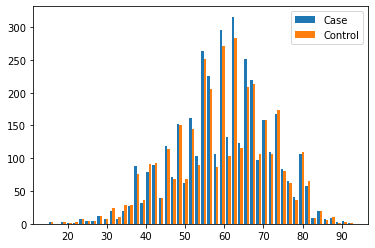

Age:不处理


In [155]:
fea = cancer_data.columns[6]
stat_info(cancer_data, fea)
print(fea+':不处理')
cancer_data2[fea] = cancer_data[fea]

Smoke:	Case	Control
Null:	False	False
均值:	366.91862794191286	75.00631911532385
方差:	497.0882919421782	251.53001908313217
Max:	5000.0	7500.0
上四分位:	600.0	0.0
中位数:	100.0	0.0
下四分位:	0.0	0.0
Min:	0.0	0.0
偏度:	2.051267061257296	10.220703054796905
峰度:	8.128748372143859	220.72049814075623
P值:	7.813003886451698e-217


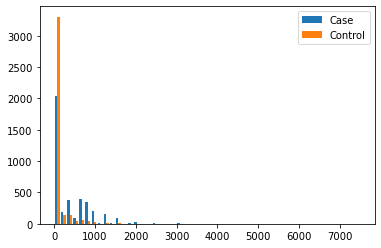

Smoke:不处理


In [158]:
fea = cancer_data.columns[7]
stat_info(cancer_data, fea)
print(fea+':不处理')
cancer_data2[fea] = cancer_data[fea]

RBC:	Case	Control
Null:	False	False
均值:	4.406805207811719	4.905397577672466
方差:	0.5905467493547621	0.5320618333281549
Max:	7.4	8.52
上四分位:	4.76	5.21
中位数:	4.41	4.89
下四分位:	4.06	4.57
Min:	1.84	2.33
偏度:	0.03220394287654117	0.543117565130891
峰度:	1.6381684116558244	2.665710637883019
P值:	2.4629616521271564e-305


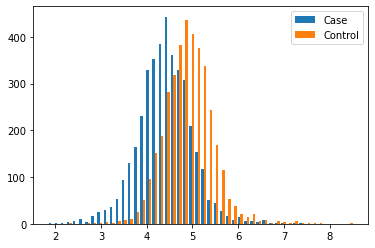

RBC:不处理


In [159]:
fea = cancer_data.columns[8]
stat_info(cancer_data, fea)
print(fea+':不处理')
cancer_data2[fea] = cancer_data[fea]

HGB:	Case	Control
Null:	False	False
均值:	129.18400600901353	149.38177988414955
方差:	18.938637033275405	14.634466544870447
Max:	224.0	235.0
上四分位:	141.0	159.0
中位数:	130.0	150.0
下四分位:	118.0	140.0
Min:	4.0	67.0
偏度:	-0.534098416353028	-0.43277401826803735
峰度:	2.7586743561277043	1.9724938165254402
P值:	0.0


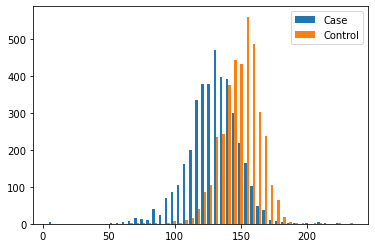

HGB:正常范围100-200，移除了30以下的值


In [162]:
fea = cancer_data.columns[9]
stat_info(cancer_data, fea)
print(fea+':正常范围100-200，移除了30以下的值')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y < 30 else y)).reset_index(level=[0,0])[fea]

HCT:	Case	Control
Null:	False	False
均值:	0.5338833249874907	0.45310953133229664
方差:	4.323767090240391	0.04014451257196567
Max:	152.0	0.71
上四分位:	0.43	0.48
中位数:	0.4	0.45
下四分位:	0.37	0.43
Min:	0.17	0.25
偏度:	32.092180348017855	-0.24110469262799794
峰度:	1038.5706614931496	1.7905477112405173
P值:	0.24966815891453886


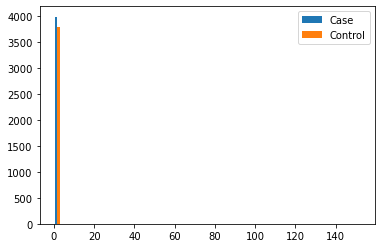

HCT:红细胞积压，表示的是百分率


In [165]:
fea = cancer_data.columns[10]
stat_info(cancer_data, fea)
print(fea+':红细胞积压，表示的是百分率')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y>1 else y)).reset_index(level=[0,0])[fea]

MCV :	Case	Control
Null:	False	False
均值:	90.39463945918872	92.67111637704052
方差:	7.289000484072181	6.256345137664674
Max:	118.0	126.8
上四分位:	94.4	96.1
中位数:	91.2	93.2
下四分位:	87.7	90.4
Min:	0.35	59.5
偏度:	-2.963182422523725	-1.7534571714377574
峰度:	25.601758116496548	6.898993249376171
P值:	1.2064187607362017e-48


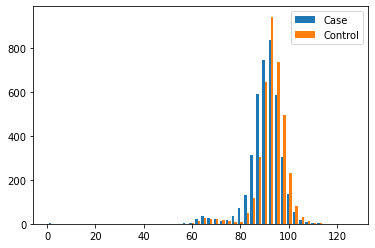

MCV :正常范围86-100，移除40以下


In [167]:
fea = cancer_data.columns[11]
stat_info(cancer_data, fea)
print(fea+':正常范围86-100，移除40以下')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y<40 else y)).reset_index(level=[0,0])[fea]

MCH:	Case	Control
Null:	False	False
均值:	29.48044566850279	30.576829910479148
方差:	3.213679236730298	2.3316986968258013
Max:	97.2	45.8
上四分位:	30.9	31.8
中位数:	29.7	30.8
下四分位:	28.5	29.8
Min:	15.9	18.2
偏度:	7.394393487707981	-1.926419813899924
峰度:	163.2281475344463	7.7419920510387135
P值:	7.680555405571511e-65


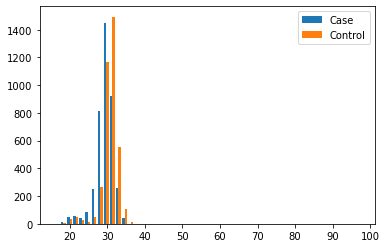

MCH:正常范围26-34，移除50以上


In [169]:
fea = cancer_data.columns[12]
stat_info(cancer_data, fea)
print(fea+':正常范围26-34，移除50以上')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y>50 else y)).reset_index(level=[0,0])[fea]

MCHC :	Case	Control
Null:	False	False
均值:	324.7129193790686	329.87282780410743
方差:	15.180252747190332	10.872977619046615
Max:	426.0	370.0
上四分位:	332.0	337.0
中位数:	325.0	330.0
下四分位:	318.0	323.0
Min:	28.3	259.0
偏度:	-7.239304612990288	-0.2620806530453273
峰度:	140.9911716583128	1.9220889901677003
P值:	6.497218671989774e-65


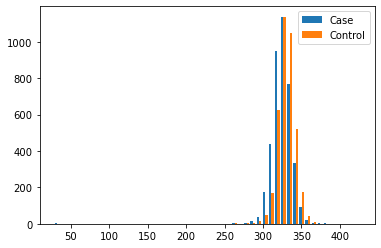

MCHC :正常范围26-34，移除200以下


In [171]:
fea = cancer_data.columns[13]
stat_info(cancer_data, fea)
print(fea+':正常范围26-34，移除200以下')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y<200 else y)).reset_index(level=[0,0])[fea]

RDW-CV:	Case	Control
Null:	False	False
均值:	42.989158738107214	13.458794102159048
方差:	14.122120064806403	1.0707229013470334
Max:	327.0	25.0
上四分位:	48.0	13.9
中位数:	45.3	13.3
下四分位:	42.3	12.8
Min:	11.4	11.3
偏度:	7.076808647960118	2.4949073690589536
峰度:	156.58577504630205	13.442495160886946
P值:	0.0


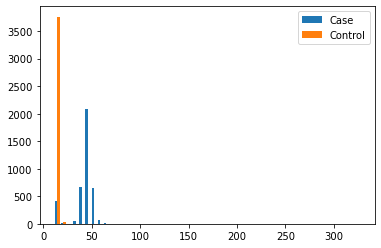

RDW-CV:移除100以上


In [173]:
fea = cancer_data.columns[14]
stat_info(cancer_data, fea)
print(fea+':移除100以上')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y>100 else y)).reset_index(level=[0,0])[fea]

RDW-SD:	Case	Control
Null:	False	False
均值:	17.471156735102664	45.409373354397154
方差:	9.868521308250335	3.68349128697957
Max:	65.8	72.3
上四分位:	15.1	47.5
中位数:	14.0	45.2
下四分位:	13.3	43.1
Min:	11.5	32.5
偏度:	2.5356940678179996	0.6279328980939861
峰度:	4.813921239118507	2.685532313686565
P值:	0.0


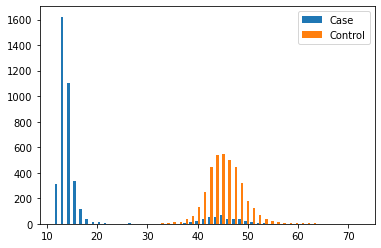

RDW-SD:不处理


In [175]:
fea = cancer_data.columns[15]
stat_info(cancer_data, fea)
print(fea+':不处理')
cancer_data2[fea] = cancer_data[fea]

PLT:	Case	Control
Null:	False	False
均值:	210.0875813720581	194.00210637177463
方差:	87.36119305848017	58.88662811319967
Max:	895.0	658.0
上四分位:	252.75	229.0
中位数:	197.0	191.0
下四分位:	150.0	153.0
Min:	7.0	42.0
偏度:	1.1544286904171424	0.6269923982465981
峰度:	2.7911259671726825	1.7742657218771951
P值:	3.2375024585600768e-21


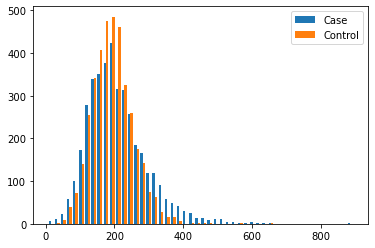

PLT:有超过600的可能，移除800以上


In [177]:
fea = cancer_data.columns[16]
stat_info(cancer_data, fea)
print(fea+':有超过600的可能，移除800以上')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y>800 else y)).reset_index(level=[0,0])[fea]

WBC:	Case	Control
Null:	False	False
均值:	7.442173259889852	6.064607688256959
方差:	4.025715123176102	4.37085807444501
Max:	101.69	256.44
上四分位:	8.54	6.86
中位数:	6.72	5.77
下四分位:	5.37	4.91
Min:	0.4	2.17
偏度:	8.890734526994143	49.593817914651005
峰度:	164.5483653667544	2837.3274938803283
P值:	6.53468939311505e-47


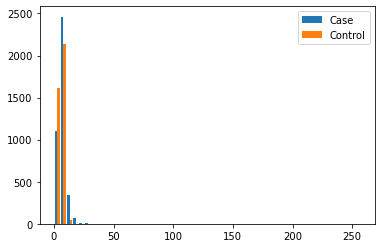

WBC:正常范围4-20，移除50以上


In [181]:
fea = cancer_data.columns[17]
stat_info(cancer_data, fea)
print(fea+':正常范围4-20，移除50以上')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y>50 else y)).reset_index(level=[0,0])[fea]

NEUT%:	Case	Control
Null:	False	False
均值:	68.00263144717057	59.05377830437072
方差:	11.028714649396074	8.46498805218019
Max:	97.7	93.1
上四分位:	75.3	64.6
中位数:	68.4	59.1
下四分位:	61.4	53.4
Min:	0.1	25.0
偏度:	-0.8581440342958098	0.009639462601308754
峰度:	3.816519105916065	0.3230653224459159
P值:	0.0


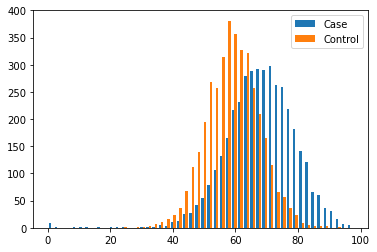

NEUT%:四分位


In [183]:
fea = cancer_data.columns[18]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

LYM%:	Case	Control
Null:	False	False
均值:	22.202804206309445	31.676592943654583
方差:	9.407833969262562	8.021805762317923
Max:	79.5	99.0
上四分位:	28.3	36.9
中位数:	21.5	31.6
下四分位:	15.3	26.3
Min:	1.0	2.2
偏度:	0.514643501573898	0.26162116611046626
峰度:	0.615924765785024	1.3779699459844075
P值:	0.0


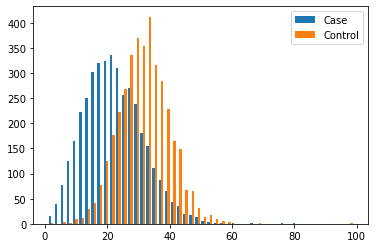

LYM%:四分位


In [186]:
fea = cancer_data.columns[19]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

MONO%:	Case	Control
Null:	False	False
均值:	6.338212318477726	6.261045286993153
方差:	2.2932877827442093	1.6229498037124162
Max:	45.0	13.5
上四分位:	7.5	7.2
中位数:	6.2	6.1
下四分位:	5.0	5.1
Min:	0.2	1.0
偏度:	2.2799375539890794	0.6378463138885772
峰度:	28.885713671159223	0.7561538865687969
P值:	0.08790868645594356


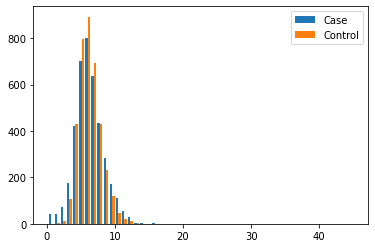

MONO%:四分位


In [230]:
fea = cancer_data.columns[20]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

EO%:	Case	Control
Null:	False	False
均值:	2.819526790185282	2.5363875724065266
方差:	2.7630978889301105	2.2062180924967603
Max:	53.8	40.5
上四分位:	3.6	3.1
中位数:	2.1	2.0
下四分位:	1.1	1.3
Min:	0.0	0.1
偏度:	4.0993205535660975	4.9327026859272225
峰度:	41.75585603426242	55.76917731946566
P值:	6.401666457738209e-07


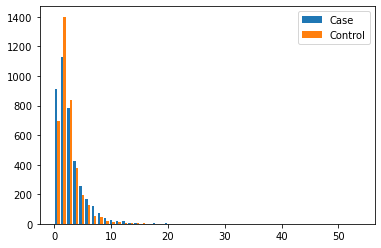

EO%:四分位


In [190]:
fea = cancer_data.columns[21]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

BASO%:	Case	Control
Null:	False	False
均值:	0.3750550826239362	0.507161664033705
方差:	1.116783312986346	0.3095466379713186
Max:	51.0	2.4
上四分位:	0.4	0.7
中位数:	0.3	0.4
下四分位:	0.2	0.3
Min:	0.0	0.1
偏度:	33.52922426941793	1.3253176252571979
峰度:	1325.4943594806757	2.5606772620101763
P值:	2.122940842873336e-12


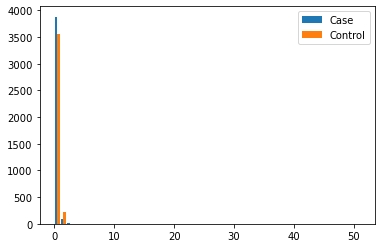

BASO%:四分位


In [192]:
fea = cancer_data.columns[22]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

NEUT:	Case	Control
Null:	False	False
均值:	5.196169253880834	3.579189046866772
方差:	3.4215824619388964	1.2639654942592315
Max:	99.25	16.15
上四分位:	6.13	4.16
中位数:	4.52	3.36
下四分位:	3.38	2.74
Min:	0.01	0.81
偏度:	9.121094204992477	2.00316578864643
峰度:	193.566049809568	10.03092004551499
P值:	6.866666115120606e-158


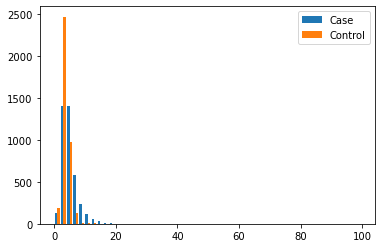

NEUT:四分位


In [194]:
fea = cancer_data.columns[23]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

LYMPH:	Case	Control
Null:	False	False
均值:	1.5167951927891872	1.8700315955766234
方差:	1.0179074279115807	4.1412870415929985
Max:	45.02	253.88
上四分位:	1.81	2.17
中位数:	1.42	1.74
下四分位:	1.08	1.36
Min:	0.05	0.27
偏度:	22.260868796683233	59.385451037110535
峰度:	873.0470123868771	3614.2324959809325
P值:	1.7666911162929094e-07


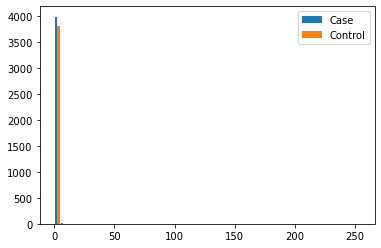

LYMPH:四分位


In [195]:
fea = cancer_data.columns[24]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

MONO:	Case	Control
Null:	False	False
均值:	0.4668227341011512	0.37245918904686426
方差:	0.28127851131139736	0.13314773762768525
Max:	6.61	2.56
上四分位:	0.56	0.44
中位数:	0.42	0.35
下四分位:	0.3	0.28
Min:	0.01	0.07
偏度:	5.964564910641943	2.1688631706174917
峰度:	95.66972236484392	21.241765398240116
P值:	6.31878739976748e-77


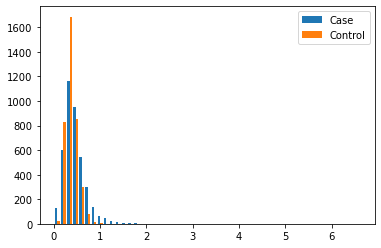

MONO:四分位


In [197]:
fea = cancer_data.columns[25]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

EO:	Case	Control
Null:	False	False
均值:	0.20775162744115988	0.15189310163243783
方差:	0.36014953958406504	0.15841665258916637
Max:	12.7	3.94
上四分位:	0.25	0.18
中位数:	0.14	0.11
下四分位:	0.07	0.07
Min:	0.0	0.01
偏度:	16.72854432126674	8.218143207543505
峰度:	455.35808087639487	138.98617418598255
P值:	1.9107019589030647e-18


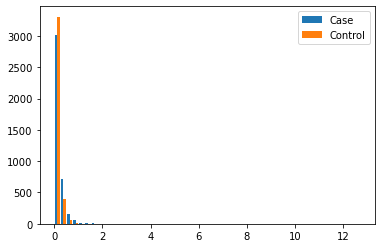

EO:四分位


In [198]:
fea = cancer_data.columns[26]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

BASO:	Case	Control
Null:	False	False
均值:	0.03411116675012591	0.02955766192733063
方差:	0.3120692251131234	0.018421061162365575
Max:	14.92	0.14
上四分位:	0.03	0.04
中位数:	0.02	0.02
下四分位:	0.01	0.02
Min:	0.0	0.01
偏度:	36.6745911295596	1.427020516219571
峰度:	1520.3783662619724	3.0293575544332807
P值:	0.36934961243061404


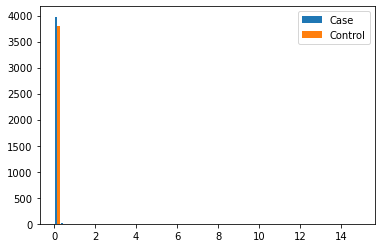

BASO:四分位


In [200]:
fea = cancer_data.columns[27]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

TBIL:	Case	Control
Null:	False	False
均值:	11.150510766149223	14.99349657714588
方差:	6.145070161704476	6.001544647222797
Max:	129.5	60.9
上四分位:	13.3	17.575000000000003
中位数:	9.9	13.9
下四分位:	7.7	11.0
Min:	0.08	2.7
偏度:	5.657459669791268	1.704006676913967
峰度:	72.94134559898495	5.701019076884104
P值:	1.867764506872895e-163


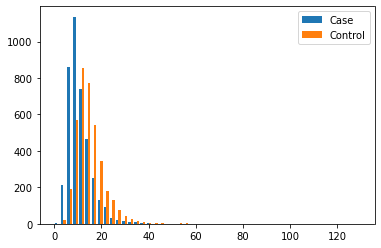

TBIL:四分位


In [201]:
fea = cancer_data.columns[28]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

DBIL:	Case	Control
Null:	False	False
均值:	3.8443915873810703	4.501342812006316
方差:	4.3588184884744345	1.9159603792315243
Max:	146.0	19.0
上四分位:	4.3	5.4
中位数:	3.2	4.2
下四分位:	2.4	3.2
Min:	0.3	0.5
偏度:	17.511679203350415	1.6157211361211274
峰度:	441.9443269153969	5.0646276194899675
P值:	1.6368599719241653e-17


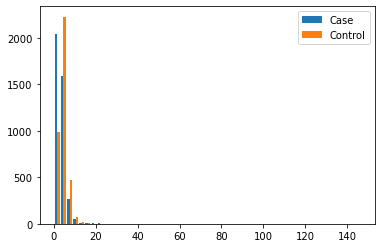

DBIL:四分位


In [202]:
fea = cancer_data.columns[29]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

IBIL:	Case	Control
Null:	False	False
均值:	7.349093640460685	10.492153765139514
方差:	3.477506811436309	4.403313755101143
Max:	45.7	45.7
上四分位:	8.9	12.4
中位数:	6.6	9.7
下四分位:	5.0	7.6
Min:	0.43	0.7
偏度:	1.8077745007388835	1.7600585391300962
峰度:	7.433636432411722	6.278500119927844
P值:	3.981036437499889e-250


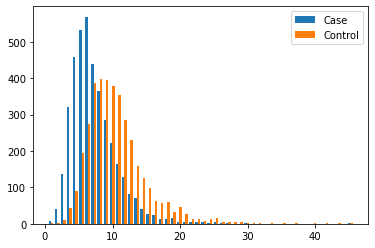

IBIL:四分位


In [203]:
fea = cancer_data.columns[30]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

ALT:	Case	Control
Null:	False	False
均值:	28.428668002003004	25.827277514481306
方差:	70.77400972582126	20.725723661503228
Max:	3860.0	749.0
上四分位:	30.0	30.0
中位数:	20.0	21.0
下四分位:	14.0	16.0
Min:	2.0	5.0
偏度:	41.91655199372133	13.313764293623734
峰度:	2183.4258488732753	402.1046399824574
P值:	0.029425811526486913


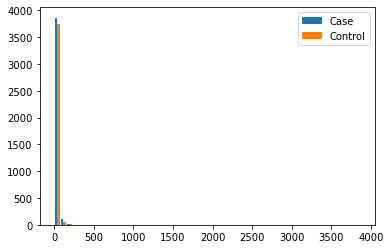

ALT:四分位


In [204]:
fea = cancer_data.columns[31]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

AST:	Case	Control
Null:	False	False
均值:	28.892163244867298	24.718272775144815
方差:	94.11283079254953	11.410696318999868
Max:	5411.0	302.0
上四分位:	28.0	27.0
中位数:	21.0	23.0
下四分位:	17.0	19.0
Min:	2.0	9.0
偏度:	48.08324807919334	7.80764898790299
峰度:	2690.428008682861	128.9456626408661
P值:	0.0066567157588240744


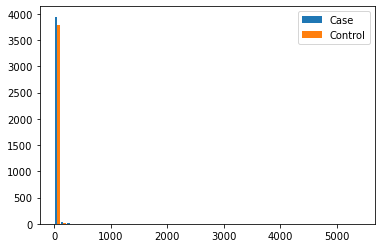

AST:四分位


In [205]:
fea = cancer_data.columns[32]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

AST:ALT:	Case	Control
Null:	False	False
均值:	1.2839334001001523	1.1180647709320701
方差:	5.4438064326723286	0.4246350199899079
Max:	341.0	6.22
上四分位:	1.39	1.32
中位数:	1.08	1.05
下四分位:	0.83	0.83
Min:	0.14	0.33
偏度:	60.94939814781441	2.075217709928424
峰度:	3800.920115479035	11.464586537217901
P值:	0.06119688434361651


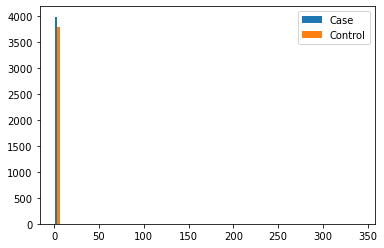

AST:ALT:四分位


In [207]:
fea = cancer_data.columns[33]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

TP:	Case	Control
Null:	False	False
均值:	67.12622183274902	74.35365982095847
方差:	6.931598724565716	4.380160461657536
Max:	90.0	94.0
上四分位:	71.7	77.27499999999999
中位数:	67.4	74.4
下四分位:	62.824999999999996	71.5
Min:	0.81	59.9
偏度:	-0.9230692666832447	0.03568234123493401
峰度:	7.745162173661193	0.1016699561653871
P值:	0.0


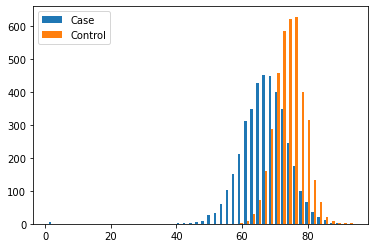

TP:四分位


In [209]:
fea = cancer_data.columns[34]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

ALB:	Case	Control
Null:	False	False
均值:	38.735403104656825	47.1065034228541
方差:	5.386383431540655	2.987121394116887
Max:	81.2	57.4
上四分位:	42.5	49.1
中位数:	39.0	47.2
下四分位:	35.4	45.1
Min:	12.7	31.9
偏度:	-0.1752769424323947	-0.1914881323217245
峰度:	1.2768154215152112	0.30943550816089127
P值:	0.0


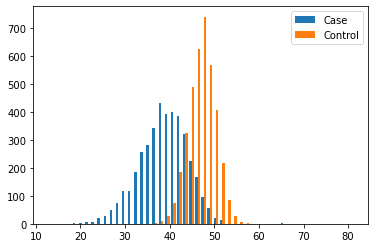

ALB:四分位


In [210]:
fea = cancer_data.columns[35]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

GLO:	Case	Control
Null:	False	False
均值:	28.529819729594404	27.247156398104323
方差:	5.620011347030124	3.905796300753688
Max:	186.0	49.6
上四分位:	31.3	29.6
中位数:	28.0	27.0
下四分位:	25.0	24.5
Min:	15.2	16.5
偏度:	6.084640854023134	0.5985903190410444
峰度:	154.50698003468648	1.1227997470602018
P值:	4.478544677610131e-31


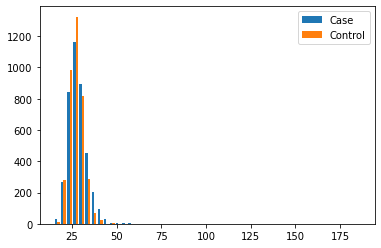

GLO:四分位


In [211]:
fea = cancer_data.columns[36]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

A/G:	Case	Control
Null:	False	False
均值:	1.4363720580871364	1.7668641390205397
方差:	1.0701548194636405	0.2906485405262118
Max:	36.7	3.04
上四分位:	1.62	1.96
中位数:	1.4	1.75
下四分位:	1.18	1.57
Min:	0.25	0.69
偏度:	27.67815079559537	0.27752036937277047
峰度:	846.3092592490833	0.2679274699047589
P值:	4.967202125351869e-74


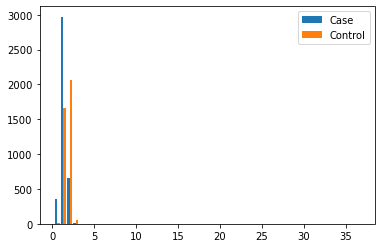

A/G:四分位


In [213]:
fea = cancer_data.columns[37]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

GLU:	Case	Control
Null:	False	False
均值:	5.432531296945423	5.706124275934681
方差:	1.5792566344018446	1.6422274894277968
Max:	26.69	21.06
上四分位:	5.7175	5.9174999999999995
中位数:	5.08	5.27
下四分位:	4.65	4.85
Min:	0.59	2.27
偏度:	4.142232879012459	3.4765525576078917
峰度:	30.63242054011123	16.81988117891134
P值:	7.268268611009115e-14


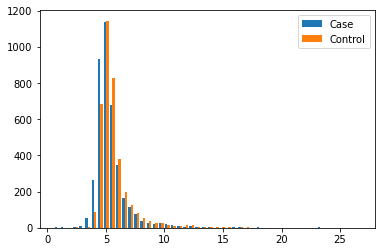

GLU:四分位


In [212]:
fea = cancer_data.columns[38]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

BUN:	Case	Control
Null:	False	False
均值:	5.455751126690037	5.192896261190091
方差:	2.366421954485643	1.5566894517799086
Max:	54.7	33.7
上四分位:	6.39	5.9
中位数:	5.115	5.0
下四分位:	4.11	4.2
Min:	1.12	1.2
偏度:	6.345310788093554	3.8335820844344712
峰度:	101.75886533196395	48.82588964062983
P值:	8.637263897080878e-09


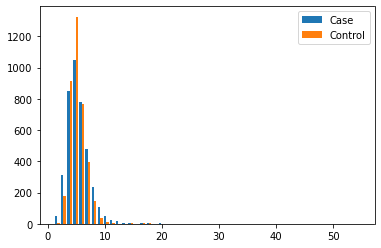

BUN:四分位


In [214]:
fea = cancer_data.columns[39]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

Cr:	Case	Control
Null:	False	False
均值:	75.30597646469694	75.27395997893628
方差:	126.24921574288277	23.934613295958055
Max:	7901.0	742.0
上四分位:	82.2	85.0
中位数:	71.4	74.0
下四分位:	60.9	63.0
Min:	2.66	30.0
偏度:	59.75229058776091	11.452026248412823
峰度:	3700.183257153662	263.0631709120472
P值:	0.9877388098770352


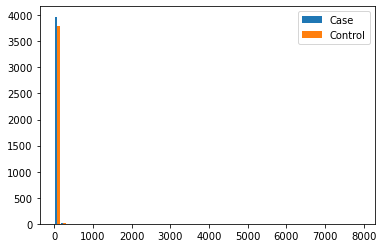

Cr:四分位


In [215]:
fea = cancer_data.columns[40]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

Cystatin-C:	Case	Control
Null:	False	False
均值:	2.1732148222333425	0.8932438125329125
方差:	19.688644730153833	0.23456280460594692
Max:	472.0	7.23
上四分位:	1.06	0.97
中位数:	0.93	0.86
下四分位:	0.84	0.77
Min:	0.41	0.42
偏度:	18.97399326236112	10.241973194511907
峰度:	380.7652874233007	221.5727863532804
P值:	6.228130196609396e-05


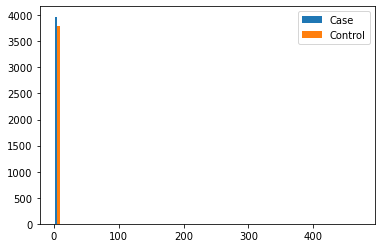

Cystatin-C:四分位


In [216]:
fea = cancer_data.columns[41]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

UA:	Case	Control
Null:	False	False
均值:	287.7302578868304	361.6119010005266
方差:	98.74916664106658	83.31224199403017
Max:	1111.0	716.0
上四分位:	344.0	415.0
中位数:	283.0	356.0
下四分位:	223.0	303.0
Min:	0.57	116.0
偏度:	0.7140712915742307	0.34919395076537796
峰度:	3.2099518535171736	0.09752544899720439
P值:	2.042874208362448e-257


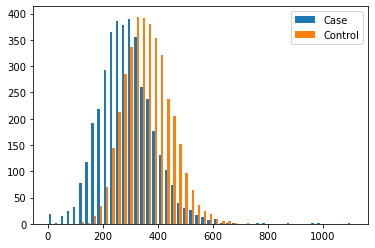

UA:四分位


In [217]:
fea = cancer_data.columns[42]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

TG:	Case	Control
Null:	False	False
均值:	1.879531797696545	1.6547604002106364
方差:	13.928740502180124	1.203748089614699
Max:	584.0	15.66
上四分位:	1.5375	1.93
中位数:	1.16	1.35
下四分位:	0.88	0.97
Min:	0.34	0.36
偏度:	31.056956816437065	4.16371585285391
峰度:	1079.0508315686516	29.106369978897774
P值:	0.3217220443711982


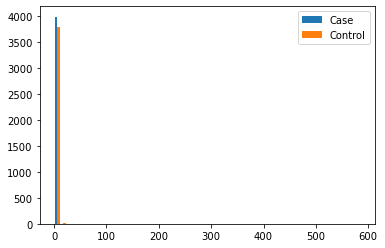

TG:四分位


In [218]:
fea = cancer_data.columns[43]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

TCH:	Case	Control
Null:	False	False
均值:	4.445085127691529	4.967680358083201
方差:	4.226062447708868	0.9698445425162707
Max:	237.0	12.17
上四分位:	4.94	5.58
中位数:	4.33	4.92
下四分位:	3.7	4.32
Min:	0.45	1.86
偏度:	46.7459537187644	0.48738381647054746
峰度:	2432.342071679838	1.7394201579843598
P值:	1.1402106649668667e-13


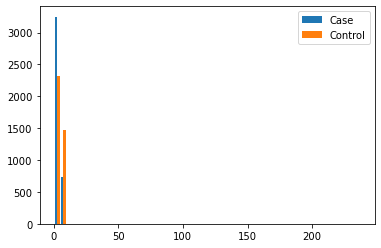

TCH:四分位


In [219]:
fea = cancer_data.columns[44]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

HDL-C:	Case	Control
Null:	False	False
均值:	1.297230846269404	1.3878988941548211
方差:	0.9899155902513217	0.3873233013750713
Max:	58.0	3.7
上四分位:	1.49	1.61
中位数:	1.24	1.33
下四分位:	1.01	1.1
Min:	0.13	0.51
偏度:	47.24679169600422	0.9066922633457888
峰度:	2697.770775741341	1.3198455095224944
P值:	1.3725137985213758e-07


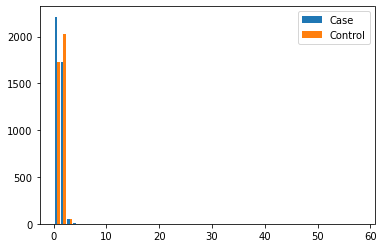

HDL-C:四分位


In [220]:
fea = cancer_data.columns[45]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

LDL-C:	Case	Control
Null:	False	False
均值:	2.8768327491236874	3.0117772511848284
方差:	5.808593199281562	0.8425005583516748
Max:	151.0	8.61
上四分位:	3.04	3.5474999999999994
中位数:	2.51	2.98
下四分位:	2.03	2.45
Min:	0.1	0.64
偏度:	19.463157513110442	0.43348389706932833
峰度:	412.5760499555452	1.5697584752516622
P值:	0.1563423519896915


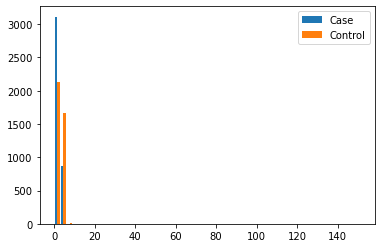

LDL-C:四分位


In [221]:
fea = cancer_data.columns[46]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

ALP:	Case	Control
Null:	False	False
均值:	101.43452679018527	76.0347551342812
方差:	110.38612937056172	22.805953440524842
Max:	3539.0	629.0
上四分位:	103.0	87.0
中位数:	82.0	73.0
下四分位:	68.0	62.0
Min:	0.89	21.0
偏度:	13.746518232693397	4.676083748436537
峰度:	308.78433155531025	93.30317797401543
P值:	2.0503473622814925e-43


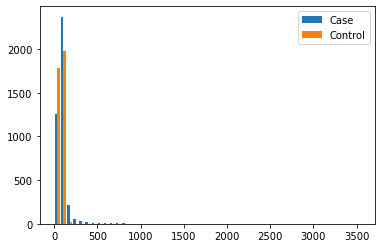

ALP:四分位


In [222]:
fea = cancer_data.columns[47]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

GGT:	Case	Control
Null:	False	False
均值:	46.5086379569354	36.976829910479196
方差:	92.62656678014238	47.23852240165465
Max:	1865.0	1122.0
上四分位:	44.75	40.0
中位数:	25.0	25.0
下四分位:	16.0	17.0
Min:	2.57	5.0
偏度:	9.534043168459421	9.264160404120565
峰度:	125.35886054738565	147.44041641922286
P值:	1.4084159127632855e-08


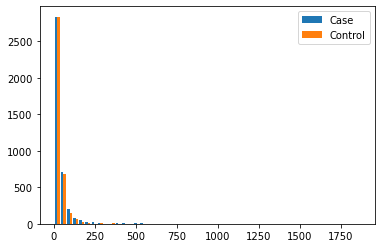

GGT:四分位


In [223]:
fea = cancer_data.columns[48]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

CK:	Case	Control
Null:	False	False
均值:	87.10826740110166	118.09478672985782
方差:	546.8809448719744	142.18333992941535
Max:	33028.0	5101.0
上四分位:	79.0	131.0
中位数:	55.0	96.0
下四分位:	38.0	75.0
Min:	1.91	21.0
偏度:	55.210084385686805	20.811347144937123
峰度:	3301.898780799874	600.7760816044287
P值:	0.0007159022979505102


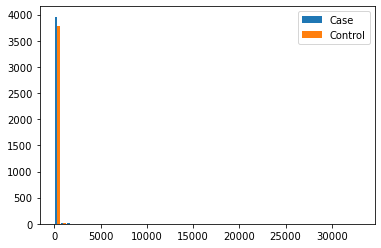

CK:四分位


In [224]:
fea = cancer_data.columns[49]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

LDH-L:	Case	Control
Null:	False	False
均值:	234.3017576364547	180.3013428120063
方差:	285.3044020087579	33.07332124428852
Max:	13790.0	580.0
上四分位:	234.0	198.0
中位数:	187.0	177.0
下四分位:	161.0	158.0
Min:	0.54	61.0
偏度:	29.01151139624582	1.470667256355468
峰度:	1291.034120864283	8.77507470678561
P值:	8.219386702448344e-31


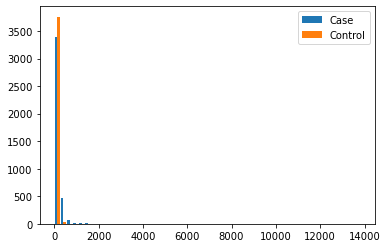

LDH-L:四分位


In [225]:
fea = cancer_data.columns[50]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

HBDH:	Case	Control
Null:	False	False
均值:	188.41501251877818	141.3678251711427
方差:	247.96404713604886	26.81585557369071
Max:	12730.0	467.0
上四分位:	186.0	155.0
中位数:	150.0	139.0
下四分位:	129.25	123.0
Min:	0.23	2.0
偏度:	33.97375091172493	1.697039294768706
峰度:	1648.700207401553	11.056043021258283
P值:	5.3259956126937405e-31


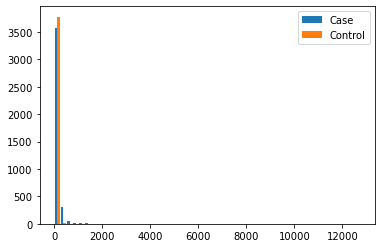

HBDH:四分位


In [226]:
fea = cancer_data.columns[51]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

T-CEA:	Case	Control
Null:	False	False
均值:	31.730525788683412	2.132847551342809
方差:	125.1498401671996	1.4176818777266678
Max:	5052.0	25.93
上四分位:	9.81	2.6975000000000002
中位数:	2.85	1.81
下四分位:	2.17	1.2
Min:	0.22	0.25
偏度:	18.684968356052003	3.337232986202304
峰度:	659.7799317939221	30.677830128335764
P值:	1.7287489568667932e-47


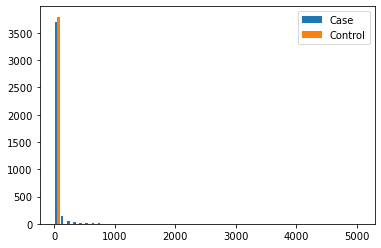

T-CEA:四分位


In [227]:
fea = cancer_data.columns[52]
stat_info(cancer_data, fea)
print(fea+':四分位')
cancer_data2[fea] = cancer_data.groupby(['A=male B=female', 'Age_group']).apply(lambda x: x[fea].apply(lambda y: np.nan if y > 3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.75) or y < -3*(x[fea].quantile(0.75)-x[fea].quantile(0.25))+x[fea].quantile(0.25) else y)).reset_index(level=[0,0])[fea]

## 对移除异常值后的AB组做t检验

In [231]:
a = cancer_data2[cancer_data2['A=Case, B=Control']=='A']
b = cancer_data2[cancer_data2['A=Case, B=Control']=='B']
dif_fea = []
for i in cancer_data2.columns[6:]:
    p_val = ss.ttest_ind(a[i].dropna(), b[i].dropna())[1]
    if p_val<0.05:
        dif_fea.append(i)
    if p_val>0.05:
        print(i)

Age
GGT
MONO%


## 替换异常值后得到V4

In [232]:
cancer_data2.to_csv('../../data/cancer_data_v4.csv', index=False)